<a href="https://colab.research.google.com/github/EdWangLoDaSc/Bayesian-Neural-Networks/blob/master/AE%20for%20hybrid_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is necessary to use tensorflow 1.14.0 under the environment of Colab.

In [1]:
pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 45 kB/s 
     |████████████████████████████████| 3.1 MB 49.4 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 488 kB 77.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [2]:
from google.colab import drive
drive.mount('./content')

Mounted at ./content


In [4]:
import pandas as pd
import numpy as np
## TensorFlow
import tensorflow as tf
#tf.compat.v1.reset_default_graph()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
df = pd.read_csv('/content/content/MyDrive/CGAN_Regression/CGAN_code/Datasets/hybrid/Hybrid_datasets.csv')
ae_targ = df.iloc[:,2:6].values

from sklearn.utils import shuffle
ae_targ = shuffle(ae_targ) 
print(ae_targ)

[[28.     28.     28.0019  0.    ]
 [ 0.     29.5    29.5    29.5566]
 [26.5273 26.5273  0.     26.5273]
 ...
 [29.8226  0.      0.      0.    ]
 [ 0.      0.     28.6125 28.6125]
 [28.0865  0.     28.1024 28.1024]]


In [ ]:
num_inputs = 4
np.random.seed(42)
## Encoder section
hidden_1 = 2     ## 256 (Number of nodes)

num_outputs = num_inputs ## 512
learning_rate = 0.0001
num_epochs = 500
batch_size = 16

activ_fn = tf.nn.relu

X = tf.compat.v1.placeholder(tf.float32,shape = [None,num_inputs])
initializer = tf.contrib.layers.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)

w2 = tf.transpose(w1)

b1 = tf.Variable(tf.zeros(hidden_1))

b2 = tf.Variable(tf.zeros(num_outputs))

hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)

output_layer = activ_fn(tf.matmul(hid_layer1,w2)+b2)

loss = tf.reduce_mean(tf.square(output_layer - X))

optimizer = tf.train.RMSPropOptimizer(learning_rate)

## Optimizer
train = optimizer.minimize(loss)


## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

to_plot = []

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, ae_targ.shape[0], batch_size)):
            xs = ae_targ[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot.append(training_loss)
        print("Epoch: {} Loss: {}".format(epoch,training_loss))
        
        
    """
    Saving the trained model
    """
    saver.save(sess,'./checkpoint/my_model')

Epoch: 0 Loss: 149.26136779785156
Epoch: 1 Loss: 104.71436309814453
Epoch: 2 Loss: 87.6874008178711
Epoch: 3 Loss: 62.599979400634766
Epoch: 4 Loss: 61.267723083496094
Epoch: 5 Loss: 60.014713287353516
Epoch: 6 Loss: 58.818603515625
Epoch: 7 Loss: 57.68648910522461
Epoch: 8 Loss: 56.70185852050781
Epoch: 9 Loss: 55.98020935058594
Epoch: 10 Loss: 55.32966613769531
Epoch: 11 Loss: 54.809085845947266
Epoch: 12 Loss: 54.34134292602539
Epoch: 13 Loss: 53.90060806274414
Epoch: 14 Loss: 53.493228912353516
Epoch: 15 Loss: 53.11456298828125
Epoch: 16 Loss: 52.75228500366211
Epoch: 17 Loss: 52.413818359375
Epoch: 18 Loss: 52.0976448059082
Epoch: 19 Loss: 51.80110168457031
Epoch: 20 Loss: 51.52165222167969
Epoch: 21 Loss: 51.25982666015625
Epoch: 22 Loss: 51.01426696777344
Epoch: 23 Loss: 50.77836608886719
Epoch: 24 Loss: 50.55281066894531
Epoch: 25 Loss: 50.333011627197266
Epoch: 26 Loss: 50.1238899230957
Epoch: 27 Loss: 49.92597961425781
Epoch: 28 Loss: 49.73881912231445
Epoch: 29 Loss: 49.5607

KeyboardInterrupt: ignored

In [ ]:
## With the weights obtained from training earlier, lets obtains the feature vectors at the latent space
with tf.Session() as sess:
    saver.restore(sess,'./checkpoint/my_model')
    res = hid_layer1.eval(feed_dict={X: ae_targ})

In [ ]:
res

array([[45.786255 , 18.553926 ],
       [48.31866  ,  0.       ],
       [ 6.4720984, 20.00421  ],
       ...,
       [47.878277 , 18.481775 ],
       [48.216587 , 18.464272 ],
       [36.181614 , 53.617195 ]], dtype=float32)

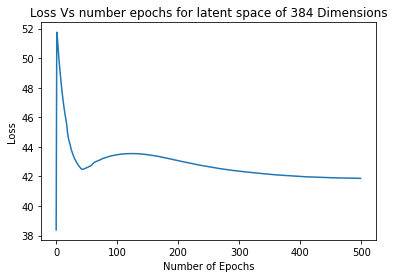

In [ ]:
## Visualizing
import matplotlib.pyplot as plt
plt.plot(to_plot)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for latent space of 384 Dimensions")
plt.show()

In [ ]:
res.shape
dr = pd.DataFrame(res)
print(dr)
dr.to_csv('loss_41.csv')

               0          1
0      45.786255  18.553926
1      48.318661   0.000000
2       6.472098  20.004210
3      44.899738   1.128664
4      22.137346   0.000000
...          ...        ...
78182  46.846451  47.101852
78183  51.056786  18.359499
78184  47.878277  18.481775
78185  48.216587  18.464272
78186  36.181614  53.617195

[78187 rows x 2 columns]
